# Métodos de Machine Learning para dados empresariais da TelecomX!

## Tratamento de dados.

### Carregamento de dados e bibliotecas python.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #instalação conjunta com 'pip install jupyterlab anywidget'

In [4]:
dados_telecomX = pd.read_csv("dados_telecomX_tratados.csv")
dados_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   objec

### Removendo colunas irrelevantes para treinamento...

* Coluna `customerID` é apenas um identificador de cliente. Por isso, não deve compor o set de dados para análise.

In [5]:
dados_telecomX = dados_telecomX.drop('customerID', axis=1)
dados_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   objec

### Separação de variável resposta (y) e variáveis explicativas (X) para construção de modelo de machine learning.

* O conjunto de dados apresenta como variável resposta a coluna `Churn`, que significa *se o cliente deixou ou não a empresa*. Ela será a variável de interesse na criação de um modelo preditivo, uma vez que a **predição** de saída ou permanência de clientes na empresa TelecomX é de suma importância no contexto do negócio.

In [6]:
X = dados_telecomX.drop('Churn', axis=1)
X.head()

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [7]:
y = dados_telecomX['Churn']
y

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7027     No
7028    Yes
7029     No
7030     No
7031     No
Name: Churn, Length: 7032, dtype: object

### Transformação de *variáveis categóricas* em *variáveis numéricas* para treinamento do modelo. Se utilizado o método `OneHotEncoder`.

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

* Para a manutenção dos nomes originais das colunas de `X`, esses identificadores serão guardados em variável própria para uso futuro.

In [9]:
colunas_X = X.columns #guarda nomes originais das colunas
colunas_X

Index(['customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

* Transformação das variáveis categóricas pelo método `OneHotEncoder`

In [10]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), [col for col in X.columns if X[col].dtype == 'object']),# drop: remove uma das colunas se 2 categorias
    remainder = 'passthrough', #não remover as demais colunas numéricas
    sparse_threshold = 0) #mantém todos os dados na transformação, não comprimir para otimizar memória...

In [11]:
X = one_hot.fit_transform(X) #realiza a transformação...acima eram apenas os parâmetros...

In [12]:
one_hot.get_feature_names_out()

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehoten

* Visualizando a transformação...

In [13]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out()).head()

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.6,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.9,542.40
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.9,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.0,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.9,267.40


* Transformação da variável resposta *y*

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder() #cria o objeto
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0], shape=(7032,))

## Separação de conjuntos **treino** e conjunto **teste** 

### Conhecendo a proporção dos dados da variável resposta `Churn`

In [16]:
dados_telecomX['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

* Os dados que compõem a variável resposta (`Churn`) estão desbalanceados. Ou seja, há proporção maior da categoria `No` se comparado a `Yes`. A variável `Churn` indica se o cliente permaneceu (`Yes`) ou não na empresa. A pergunda de negócio a se determinar é como predizer se um cliente permanecerá ou não com a empresa TelecomX, dadas as informações contidas nas variáveis do banco de dados.
* Como está subrepresentada a classe `Yes`, há chance maior de que as métricas de qualidade dos modelos sejam piores para predizer os valores para essa classe.
* Portanto, uma estratégia é balancear as classes da variável `Churn`.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
 ##stratify=y -> mantém a proporção em que 'sim' e 'não' 
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify=y, random_state=15)

## Métodos de Classificação

### O modelo-base (*dummy*) com `DummyClassifier`

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify=y, random_state=15)

In [21]:
dummy = DummyClassifier() # cria o objeto
dummy.fit(X_treino, y_treino) # treina o modelo

,strategy,'prior'
,random_state,None
,constant,None


In [22]:
dummy.score(X_teste, y_teste)   #prediz o y (y_predito) através de x_teste. 
                                #Após, compara com y_teste para determinar a taxa de acertos...

0.7343572241183163

### Árvore de Decisão com `DecisionTreeClassifier`

#### Balanceamento de dados


In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#### Uso de pipeline para validação de dados
* a biblioteca `imblearn` possui método para automatizar o processo de validação cruzada dos dados, a partir de técnica de balanceamento de dados de *oversampling* ou *undersamplig*.
* **Oversampling**: A estratégia de oversampling consiste em aumentar a quantidade de dados da classe que possui menor frequência até que tenha a mesma quantidade da classe de maior frequência. Dessa maneira, o modelo se atentará mais para o padrão dos dados da classe que tinha menor frequência a princípio e poderá diferenciar melhor as duas classes.
* **Undersampling**: A estratégia de undersampling é contrária ao oversampling, e consiste em reduzir a quantidade de dados da classe que possui maior frequência até que tenha a mesma quantidade da classe de menor frequência. Dessa forma, o modelo não dará atenção somente aos dados de maior quantidade e poderá diferenciar melhor as duas classes.
* Para a validação cruzada, se utilizará o método `StratifiedKFold`.
* A acurácia (*score*) do algoritmo de Árvore de Decisão é dependente de parâmetros como a *profundidade* da árvore. Ou seja, quantos ramos serão utilizados para classificar e predizer a variável resposta.
* Por esse motivo, avalia-se o comportamento do *score* iterando sobre o parâmetro `max_deph`.

##### Oversamplig

In [24]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    return (media - 2*desvio_padrao), (media), (min(media + 2*desvio_padrao, 1))

In [25]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X, y)

In [26]:
pd.DataFrame(y_balanceado).value_counts(normalize = True)

0
0    0.5
1    0.5
Name: proportion, dtype: float64

In [27]:
from imblearn.pipeline import Pipeline as imbpipeline

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

In [29]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = DecisionTreeClassifier(max_depth = n, random_state=n)
    pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['max_depth'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo

In [30]:
df_scores_DecisionTreeClassifier_oversample = pd.DataFrame(data=scores).set_index('max_depth')
df_scores_DecisionTreeClassifier_oversample

,interv_min_conf,media,interv_max_conf,dif_intervalo
max_depth,,,,
2,0.481815,0.676332,0.870848,0.389034
3,0.633730,0.727637,0.821543,0.187813
4,0.575202,0.714314,0.853425,0.278223
5,0.549354,0.575177,0.601001,0.051647
6,0.576525,0.623845,0.671165,0.094640
7,0.537915,0.571976,0.606037,0.068122
8,0.480383,0.595498,0.710613,0.230230
9,0.519337,0.582135,0.644933,0.125595
10,0.527838,0.578399,0.628959,0.101121


In [31]:
import plotly.express as px
px.line(data_frame=df_scores_DecisionTreeClassifier_oversample, y=['interv_min_conf', 'media', 'interv_max_conf'], markers=True)

##### Undersampling

In [32]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = DecisionTreeClassifier(max_depth = n, random_state=n)
    pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['max_depth'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo


In [33]:
df_scores_DecisionTreeClassifier_undersample = pd.DataFrame(data=scores).set_index('max_depth')
df_scores_DecisionTreeClassifier_undersample

,interv_min_conf,media,interv_max_conf,dif_intervalo
max_depth,,,,
2,0.198991,0.682552,1.000000,0.801009
3,0.635081,0.735179,0.835278,0.200196
4,0.392329,0.605779,0.819229,0.426901
5,0.590461,0.687584,0.784707,0.194246
6,0.571619,0.669838,0.768057,0.196438
7,0.605981,0.663978,0.721974,0.115993
8,0.646101,0.685937,0.725773,0.079672
9,0.580461,0.672509,0.764558,0.184098
10,0.600692,0.638301,0.675909,0.075217


In [34]:
import plotly.express as px
px.line(data_frame=df_scores_DecisionTreeClassifier_undersample, y=['interv_min_conf', 'media', 'interv_max_conf'], markers=True)

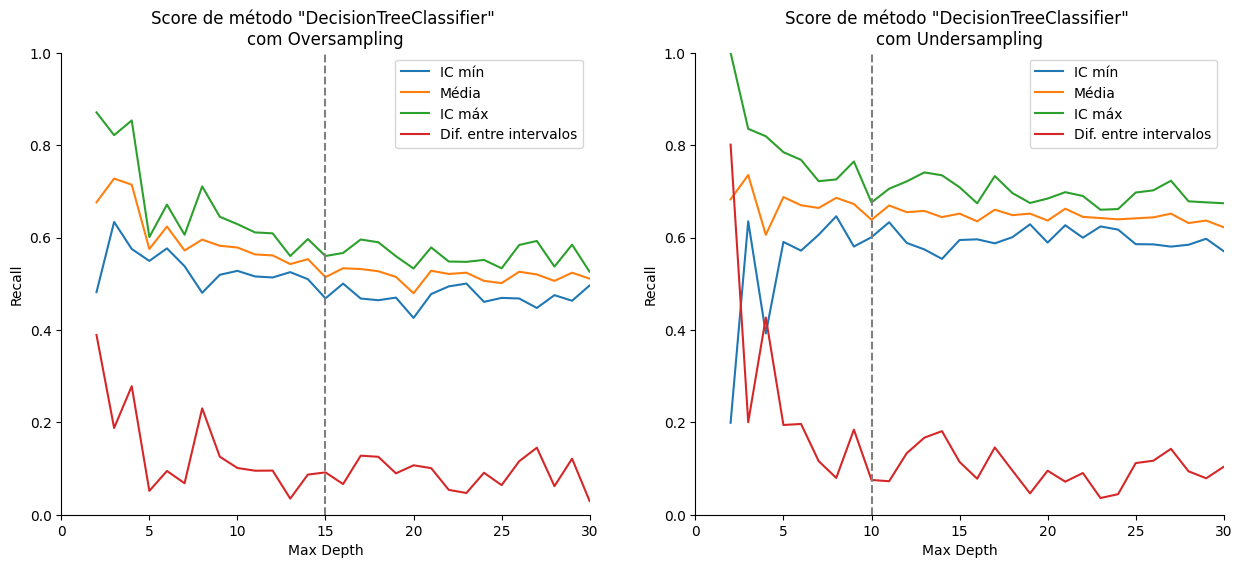

In [35]:
import matplotlib.patches as patches
#rect = patches.Rectangle((0, 0.7), 30, 0.15, linewidth=1, edgecolor='r', facecolor='none')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax[0].set_title('Score de método "DecisionTreeClassifier" \ncom Oversampling')
ax[0].plot(df_scores_DecisionTreeClassifier_oversample, label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('Recall')
ax[0].set_xlim(0,30)
ax[0].set_ylim(0,1)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].legend()
ax[0].axvline(x=15, color='grey', linestyle='--')
#ax[0].add_patch(rect)

ax[1].set_title('Score de método "DecisionTreeClassifier" \ncom Undersampling')
ax[1].plot(df_scores_DecisionTreeClassifier_undersample,  label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('Recall')
ax[1].set_xlim(0,30)
ax[1].set_ylim(0,1)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].legend()
ax[1].axvline(x=10, color='grey', linestyle='--')


### Análise do método de classificação `DecisionTreeClassifier`
* Em média, a métrica **recall** se mostrou mais consistente com balanceamento de dados com o método *Undersampling*;
* A configuração de `max_depth = 10` apresenta menor variabilidade **(IC mín=0.600692, Média=0.638301, IC máx=0.675909 e Dif. IC=0.075217)**.
* Portanto, para avaliação do modelo de classificação `DecisionTreeClassifier`, o método escolhido de balanceamento foi `NearMiss(version = 3)` e `max_depth = 10`;

### Testando o modelo:

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1291
           1       0.56      0.81      0.66       467

    accuracy                           0.78      1758
   macro avg       0.74      0.79      0.75      1758
weighted avg       0.82      0.78      0.79      1758



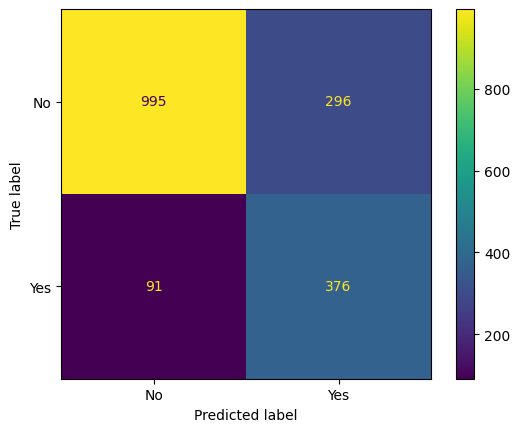

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

undersample = NearMiss(version = 3)
X_balanceado, y_balanceado = undersample.fit_resample(X, y)
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(X_balanceado, y_balanceado)
y_previsto = modelo.predict(X_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto, display_labels=['No', 'Yes']);

In [37]:
tree = DecisionTreeClassifier(max_depth=5, random_state=15)
tree.fit(X_treino, y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


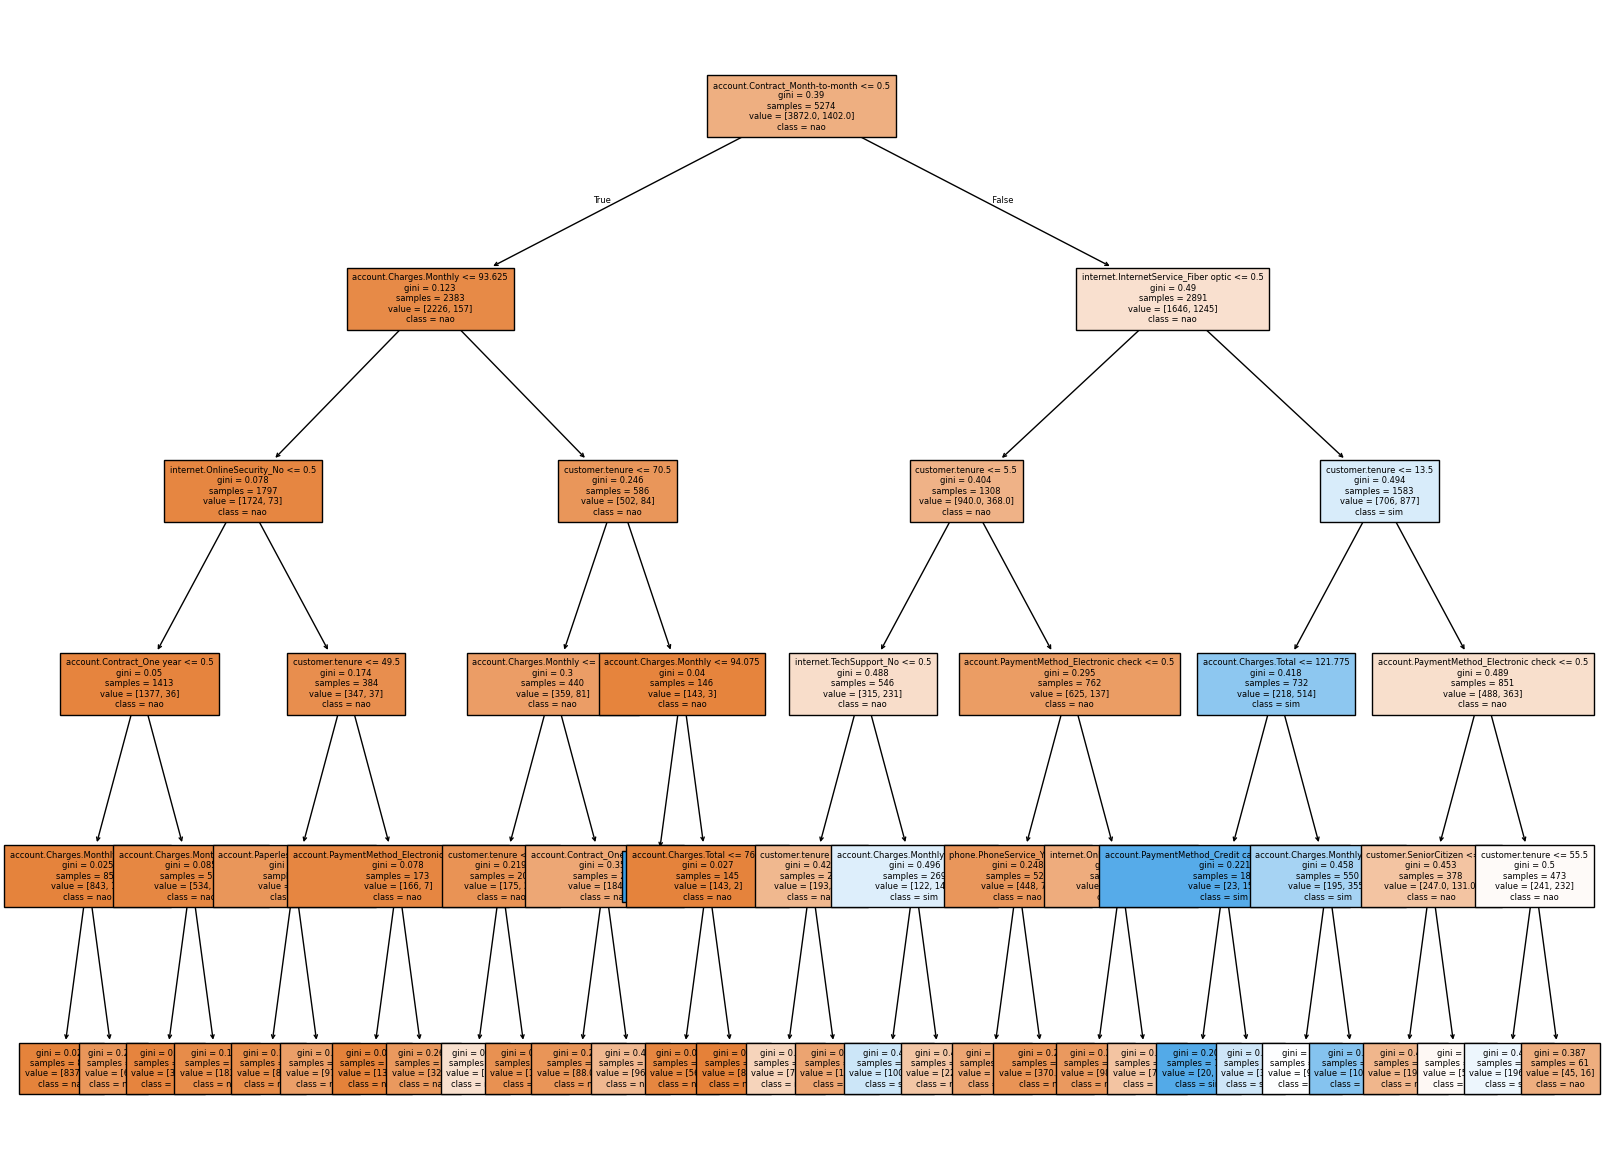

In [38]:
from sklearn.tree import plot_tree

nome_colunas = []
for nome in one_hot.get_feature_names_out():
    nome_col = nome.split('__')
    nome_colunas.append(nome_col[1])

plt.figure(figsize=(20,15))
plot_tree(tree, filled=True, class_names=['nao', 'sim'], fontsize=6, feature_names=nome_colunas)
plt.show()

### Algoritmo Random Forest com `RandomForestClassifier`

* No método de `RandomForestClassifier`, o mesmo pipeline será executado, lançando mão de balanceamento de dados com a biblioteca `imblearn`, método para automatizar o processo de validação cruzada dos dados, e as técnicas de balanceamento de dados de *oversampling* ou *undersamplig*.
* Será realizada a iteração sobre o parâmetro `max_depth`.

In [39]:
from sklearn.ensemble import RandomForestClassifier

##### Oversamplig

In [40]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X, y)

In [41]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = RandomForestClassifier(max_depth = n, random_state=n)
    pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['max_depth'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo

In [42]:
df_scores_RandomForestClassifier_oversample = pd.DataFrame(data=scores).set_index('max_depth')
df_scores_RandomForestClassifier_oversample

,interv_min_conf,media,interv_max_conf,dif_intervalo
max_depth,,,,
2,0.714411,0.759238,0.804064,0.089653
3,0.661937,0.729284,0.796631,0.134693
4,0.662940,0.712692,0.762445,0.099505
5,0.630826,0.684863,0.738901,0.108075
6,0.602488,0.673054,0.743620,0.141132
7,0.620450,0.670426,0.720402,0.099952
8,0.584464,0.645262,0.706061,0.121597
9,0.573702,0.630825,0.687949,0.114247
10,0.565276,0.614760,0.664243,0.098966


In [43]:
px.line(data_frame=df_scores_RandomForestClassifier_oversample, y=['interv_min_conf', 'media', 'interv_max_conf'], markers=True)

##### Undersampling

In [44]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = RandomForestClassifier(max_depth = n, random_state=n)
    pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['max_depth'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo

In [45]:
df_scores_RandomForestClassifier_undersample = pd.DataFrame(data=scores).set_index('max_depth')
df_scores_RandomForestClassifier_undersample

,interv_min_conf,media,interv_max_conf,dif_intervalo
max_depth,,,,
2,0.663444,0.728742,0.794041,0.130597
3,0.693097,0.725000,0.756904,0.063807
4,0.661857,0.716440,0.771022,0.109165
5,0.673852,0.720182,0.766512,0.092660
6,0.665152,0.698756,0.732359,0.067207
7,0.662189,0.698238,0.734287,0.072098
8,0.640338,0.692893,0.745448,0.105110
9,0.656851,0.692883,0.728915,0.072064
10,0.677506,0.697692,0.717878,0.040372


In [46]:
px.line(data_frame=df_scores_RandomForestClassifier_undersample, y=['interv_min_conf', 'media', 'interv_max_conf'], markers=True)

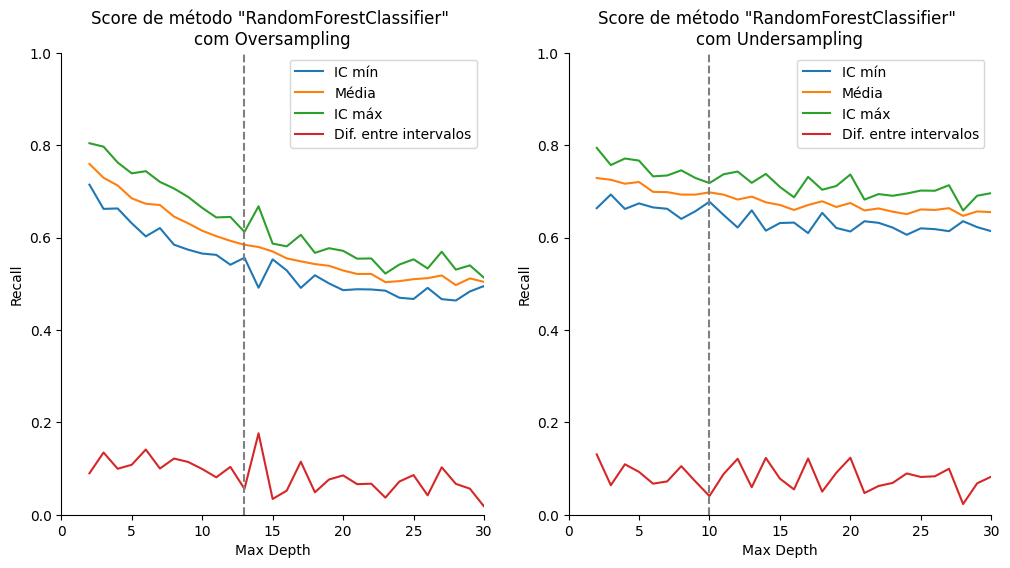

In [47]:
import matplotlib.patches as patches
#rect = patches.Rectangle((0, 0.7), 30, 0.15, linewidth=1, edgecolor='r', facecolor='none')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].set_title('Score de método "RandomForestClassifier" \ncom Oversampling')
ax[0].plot(df_scores_RandomForestClassifier_oversample, label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('Recall')
ax[0].set_xlim(0,30)
ax[0].set_ylim(0,1)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].legend()
ax[0].axvline(x=13, color='grey', linestyle='--')
#ax[0].add_patch(rect)

ax[1].set_title('Score de método "RandomForestClassifier" \ncom Undersampling')
ax[1].plot(df_scores_RandomForestClassifier_undersample,  label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('Recall')
ax[1].set_xlim(0,30)
ax[1].set_ylim(0,1)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].legend()
ax[1].axvline(x=10, color='grey', linestyle='--')

### Análise do método de classificação `RandomForestClassifier`
* Em média, a métrica **recall** se mostrou mais consistente com balanceamento de dados com o método *Undersampling*;
* A configuração de `max_depth = 10` apresenta menor variabilidade **(IC mín= 0.677506, Média=0.697692, IC máx=0.717878 e Dif. IC=0.040372)**.
* Portanto, para avaliação do modelo de classificação `RandomForestClassifier`, o método escolhido de balanceamento foi `NearMiss(version = 3)` e `max_depth = 10`;

### Testando o modelo:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1291
           1       0.64      0.88      0.74       467

    accuracy                           0.84      1758
   macro avg       0.79      0.85      0.81      1758
weighted avg       0.87      0.84      0.84      1758



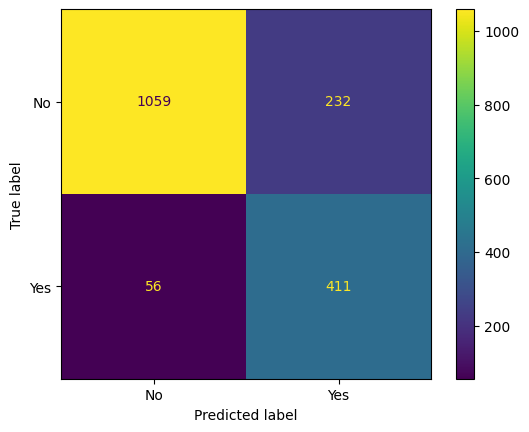

In [48]:
undersample = NearMiss(version = 3)
X_balanceado, y_balanceado = undersample.fit_resample(X, y)
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X_balanceado, y_balanceado)
y_previsto = modelo.predict(X_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto, display_labels=['No', 'Yes']);

### Algoritmo KNN (*vizinhos mais próximos*) com `KNeighborsClassifier`

* No método de `KNeighborsClassifier`, o mesmo pipeline será executado, lançando mão de balanceamento de dados com a biblioteca `imblearn`, método para automatizar o processo de validação cruzada dos dados, e as técnicas de balanceamento de dados de *oversampling* ou *undersamplig*.
* Será realizada a iteração sobre o parâmetro `n_neighbors`.

#### Normalização dos dados

* Há variáveis em que as escalas são diferentes, pois as variáveis categóricas foram transformadas em binárias (variando entre 0 e 1), enquanto as variáveis `customer.tenure`, `account.Charges.Monthly` e `account.Charges.Total` mantiveram suas escalas originais. Portanto, os dados devem ser normalizados para escalas entre 0 e 1, independentemente da variável.
* Usar o método `MinMaxScaler` para normalizar os dados, os quais ficarão entre 0 e 1.

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
normalizacao = MinMaxScaler() #inicia a classe
X_normalizado = normalizacao.fit_transform(X) # valores min serão zero, e max serão 1...
X_teste_normalizado = normalizacao.transform(X_teste) #para testar o desempenho da classificação

In [51]:
pd.DataFrame(X_normalizado, columns= one_hot.get_feature_names_out()).head() #visualizando a normalização
                                                                                # em dataframe...

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.471144,0.066294
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.414428,0.060420
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.042254,0.553731,0.030239
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.169014,0.793532,0.140670
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.028169,0.653234,0.028687


In [52]:
from sklearn.neighbors import KNeighborsClassifier

##### Oversamplig

In [53]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = KNeighborsClassifier(n_neighbors= n, n_jobs=-1)
    pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X_normalizado, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['n_neighbors'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo

In [54]:
df_scores_KNeighborsClassifier_oversample = pd.DataFrame(data=scores).set_index('n_neighbors')
df_scores_KNeighborsClassifier_oversample

,interv_min_conf,media,interv_max_conf,dif_intervalo
n_neighbors,,,,
2,0.356305,0.425377,0.494450,0.138145
3,0.583871,0.650633,0.717395,0.133524
4,0.546595,0.599247,0.651900,0.105306
5,0.681436,0.722836,0.764235,0.082800
6,0.611903,0.669864,0.727825,0.115922
7,0.732954,0.753877,0.774801,0.041848
8,0.652094,0.697705,0.743315,0.091221
9,0.717069,0.769904,0.822740,0.105671
10,0.689821,0.742640,0.795460,0.105639


In [55]:
px.line(data_frame=df_scores_KNeighborsClassifier_oversample, y=['interv_min_conf', 'media', 'interv_max_conf'], markers=True)

##### Undersampling

In [56]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = KNeighborsClassifier(n_neighbors= n, n_jobs=-1)
    pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X_normalizado, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['n_neighbors'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo

In [57]:
df_scores_KNeighborsClassifier_undersample = pd.DataFrame(data=scores).set_index('n_neighbors')
df_scores_KNeighborsClassifier_undersample

,interv_min_conf,media,interv_max_conf,dif_intervalo
n_neighbors,,,,
2,0.333474,0.364915,0.396356,0.062881
3,0.546338,0.592832,0.639326,0.092988
4,0.423977,0.463337,0.502696,0.078719
5,0.556592,0.608341,0.660090,0.103498
6,0.439809,0.506657,0.573504,0.133694
7,0.602174,0.631886,0.661598,0.059424
8,0.488656,0.545212,0.601768,0.113112
9,0.609121,0.648993,0.688865,0.079744
10,0.503708,0.574618,0.645528,0.141820


In [58]:
px.line(data_frame=df_scores_KNeighborsClassifier_undersample, y=['interv_min_conf', 'media', 'interv_max_conf'], markers=True)

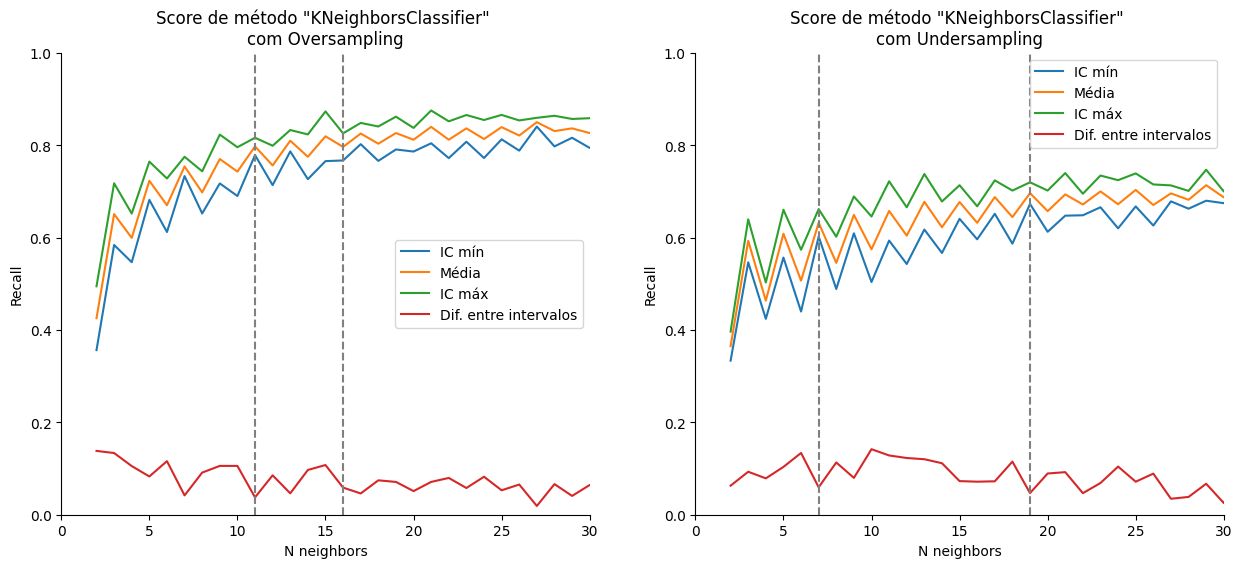

In [59]:
import matplotlib.patches as patches
#rect = patches.Rectangle((0, 0.7), 30, 0.15, linewidth=1, edgecolor='r', facecolor='none')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax[0].set_title('Score de método "KNeighborsClassifier" \ncom Oversampling')
ax[0].plot(df_scores_KNeighborsClassifier_oversample, label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[0].set_xlabel('N neighbors')
ax[0].set_ylabel('Recall')
ax[0].set_xlim(0,30)
ax[0].set_ylim(0,1)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].legend()
ax[0].axvline(x=11, color='grey', linestyle='--')
ax[0].axvline(x=16, color='grey', linestyle='--')
#ax[0].axvline(x=23, color='grey', linestyle='--')

#ax[0].add_patch(rect)

ax[1].set_title('Score de método "KNeighborsClassifier" \ncom Undersampling')
ax[1].plot(df_scores_KNeighborsClassifier_undersample, label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[1].set_xlabel('N neighbors')
ax[1].set_ylabel('Recall')
ax[1].set_xlim(0,30)
ax[1].set_ylim(0,1)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].legend()
ax[1].axvline(x=7, color='grey', linestyle='--')
ax[1].axvline(x=19, color='grey', linestyle='--')

### Análise do método de classificação `KNeighborsClassifier`


|n_neighborns|IC mín|Média|IC máx|Dif. IC|Método|
|:----------:|:----:|:---:|:----:|:-----:|:-----:|
|16|0.776353|0.796675|0.816997|0.040644|Oversampling|
|19|0.672643|0.696092|0.719541|0.046898|Undersampling|

* Em média, a métrica **recall** se mostrou mais consistente com balanceamento de dados com o método *Oversampling*;
* A configuração de `n_neighbors = 16` apresenta melhor média **(IC mín= 0.776353, Média=0.796675, IC máx=0.816997 e Dif. IC=0.040644)**.
* Portanto, para avaliação do modelo de classificação `KNeighborsClassifier`, o método escolhido de balanceamento foi `SMOTE()` e `n_neighbors = 16`;

### Testando o modelo:

              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1291
           1       0.49      0.86      0.63       467

    accuracy                           0.73      1758
   macro avg       0.71      0.77      0.71      1758
weighted avg       0.81      0.73      0.74      1758



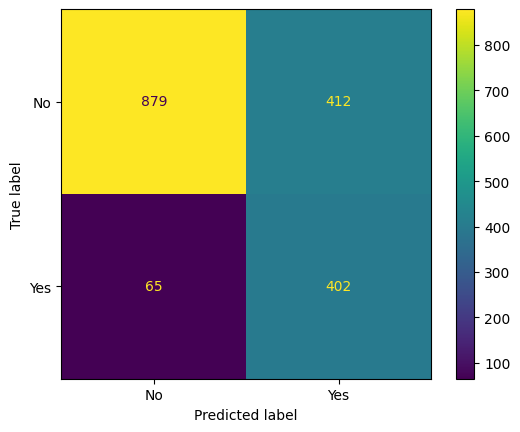

In [157]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X_normalizado, y)
modelo = KNeighborsClassifier(n_neighbors = 16)
modelo.fit(X_balanceado, y_balanceado)
y_previsto = modelo.predict(X_teste_normalizado)

print(classification_report(y_teste, y_previsto))
confusion_matrix_all_var = ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto, display_labels=['No', 'Yes'])
confusion_matrix_all_var;

## Interpretação e Resultados

| Classificador             | IC Mínimo | Média     | IC Máximo | Dif. IC   |
|--------------------------|-----------|-----------|-----------|-----------|
| DecisionTreeClassifier   | 0.600692  | 0.638301  | 0.675909  | 0.075217  |
| RandomForestClassifier   | 0.677506  | 0.697692  | 0.717878  | 0.040372  |
| KNeighborsClassifier     | 0.776353  | 0.796675  | 0.816997  | 0.040644  |

In [61]:
from sklearn.inspection import permutation_importance

In [62]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X_normalizado, y)
modelo_knn = KNeighborsClassifier(n_neighbors = 16)
modelo_knn.fit(X_balanceado, y_balanceado)

,n_neighbors,16
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [91]:
result = permutation_importance(modelo_knn, X_teste_normalizado, y_teste, n_repeats=100, random_state=42)

In [92]:
importance_df = pd.DataFrame({
    'Variável': pd.DataFrame(X_normalizado, columns= one_hot.get_feature_names_out()).columns,
    'Importância Média': result.importances_mean,
    'Importância DP': result.importances_std
    
}).sort_values(by='Importância Média', ascending=True)

print(importance_df)


                                             Variável  Importância Média  \
6              onehotencoder__phone.MultipleLines_Yes          -0.008720   
4               onehotencoder__phone.MultipleLines_No          -0.008322   
35  onehotencoder__account.PaymentMethod_Mailed check          -0.006502   
3               onehotencoder__phone.PhoneService_Yes          -0.006234   
5   onehotencoder__phone.MultipleLines_No phone se...          -0.006234   
2              onehotencoder__customer.Dependents_Yes          -0.006081   
13            onehotencoder__internet.OnlineBackup_No          -0.004977   
27        onehotencoder__internet.StreamingMovies_Yes          -0.004198   
25         onehotencoder__internet.StreamingMovies_No          -0.003942   
1                 onehotencoder__customer.Partner_Yes          -0.003885   
8   onehotencoder__internet.InternetService_Fiber ...          -0.003805   
24            onehotencoder__internet.StreamingTV_Yes          -0.002076   
0           

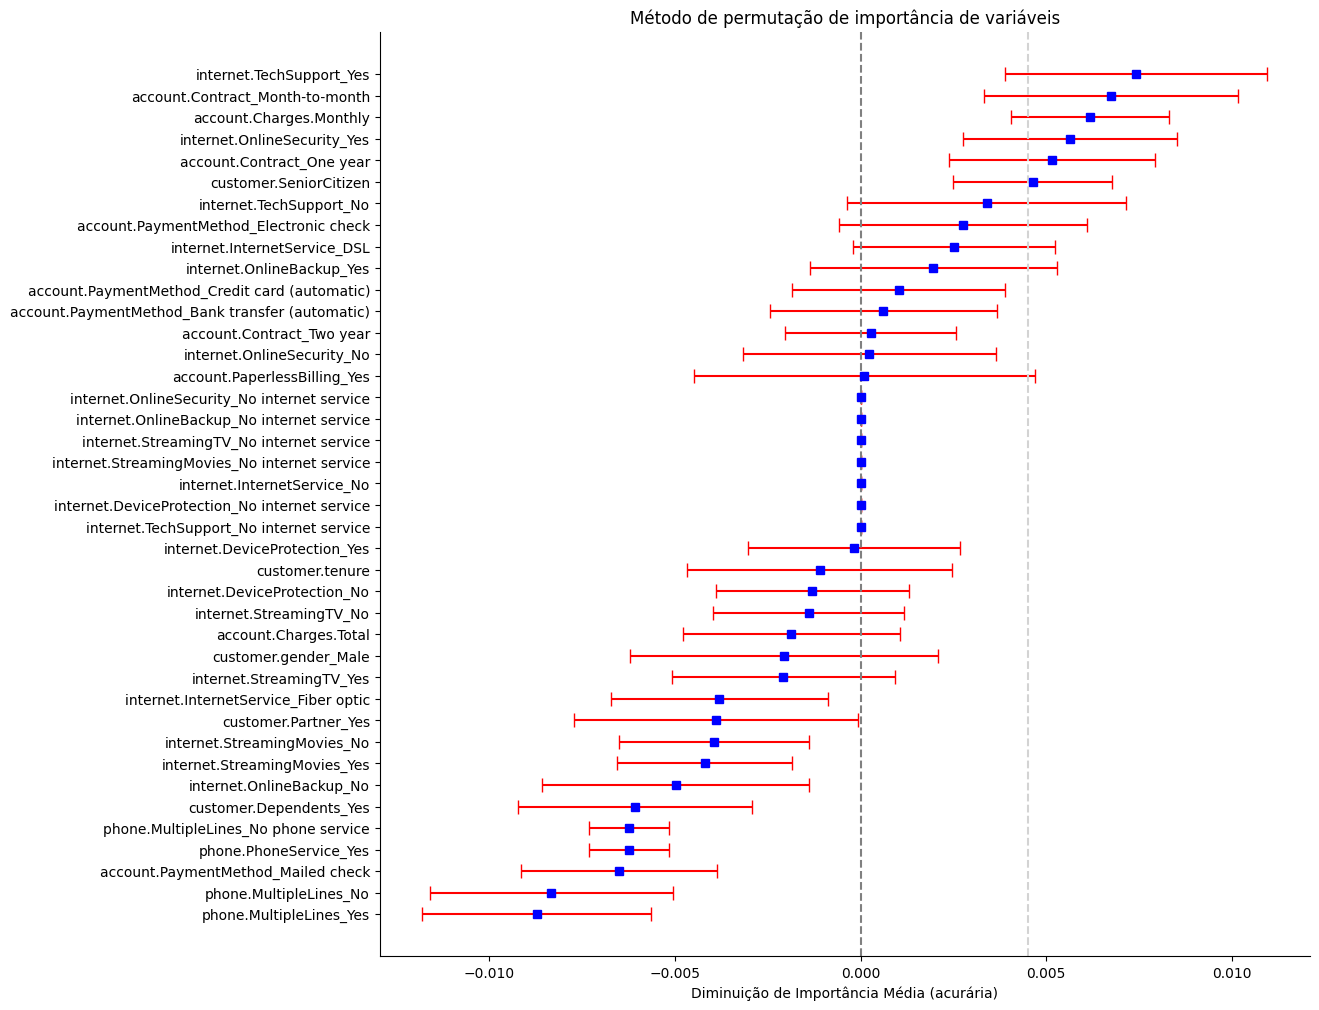

In [101]:
variaveis = [col.split('__')[1] for col in importance_df['Variável']]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Método de permutação de importância de variáveis')
ax.errorbar(x=importance_df['Importância Média'], y=variaveis, xerr=importance_df['Importância DP'], fmt='s', color='blue', ecolor='red', capsize=5)
ax.set_xlabel('Diminuição de Importância Média (acurária)')
ax.spines[['top', 'right']].set_visible(False)
ax.axvline(x=0, color='grey', linestyle='--')
ax.axvline(x=0.0045, color='lightgrey', linestyle='--')



### Separando as variáveis que serão descartadas:

In [140]:
variaveis = [
    col
    for col, media in zip(importance_df['Variável'], importance_df['Importância Média'])
    if media < 0.0045
]
variaveis

['onehotencoder__phone.MultipleLines_Yes',
 'onehotencoder__phone.MultipleLines_No',
 'onehotencoder__account.PaymentMethod_Mailed check',
 'onehotencoder__phone.PhoneService_Yes',
 'onehotencoder__phone.MultipleLines_No phone service',
 'onehotencoder__customer.Dependents_Yes',
 'onehotencoder__internet.OnlineBackup_No',
 'onehotencoder__internet.StreamingMovies_Yes',
 'onehotencoder__internet.StreamingMovies_No',
 'onehotencoder__customer.Partner_Yes',
 'onehotencoder__internet.InternetService_Fiber optic',
 'onehotencoder__internet.StreamingTV_Yes',
 'onehotencoder__customer.gender_Male',
 'remainder__account.Charges.Total',
 'onehotencoder__internet.StreamingTV_No',
 'onehotencoder__internet.DeviceProtection_No',
 'remainder__customer.tenure',
 'onehotencoder__internet.DeviceProtection_Yes',
 'onehotencoder__internet.TechSupport_No internet service',
 'onehotencoder__internet.DeviceProtection_No internet service',
 'onehotencoder__internet.InternetService_No',
 'onehotencoder__inte

### Separando em variáveis de maior importância

In [141]:
X_importantes = dados_telecomX.drop('Churn', axis=1)
X_importantes

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7028,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7029,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [142]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), [col for col in X_importantes.columns if X_importantes[col].dtype == 'object']),# drop: remove uma das colunas se 2 categorias
    remainder = 'passthrough', #não remover as demais colunas numéricas
    sparse_threshold = 0) #mantém todos os dados na transformação, não comprimir para otimizar memória...

In [143]:
X_importantes = one_hot.fit_transform(X_importantes) #realiza a transformação...acima eram apenas os parâmetros...

In [144]:
one_hot.get_feature_names_out()

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehoten

In [145]:
X_importantes_df = pd.DataFrame(X_importantes, columns=one_hot.get_feature_names_out())
X_importantes_df

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,...,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_Yes,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65


In [163]:
X_importantes = X_importantes_df.drop(variaveis, axis=1)
X_importantes

,onehotencoder__internet.OnlineSecurity_Yes,onehotencoder__internet.TechSupport_Yes,onehotencoder__account.Contract_Month-to-month,onehotencoder__account.Contract_One year,remainder__customer.SeniorCitizen,remainder__account.Charges.Monthly
0,0.0,1.0,0.0,1.0,0.0,65.60
1,0.0,0.0,1.0,0.0,0.0,59.90
2,0.0,0.0,1.0,0.0,0.0,73.90
3,0.0,0.0,1.0,0.0,1.0,98.00
4,0.0,1.0,1.0,0.0,1.0,83.90
...,...,...,...,...,...,...
7027,1.0,1.0,0.0,1.0,0.0,55.15
7028,0.0,0.0,1.0,0.0,0.0,85.10
7029,0.0,0.0,1.0,0.0,0.0,50.30
7030,1.0,1.0,0.0,0.0,0.0,67.85


In [164]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), [col for col in X_importantes.columns if X_importantes[col].dtype == 'object']),# drop: remove uma das colunas se 2 categorias
    remainder = 'passthrough', #não remover as demais colunas numéricas
    sparse_threshold = 0) #mantém todos os dados na transformação, não comprimir para otimizar memória...

In [165]:
X_importantes = one_hot.fit_transform(X_importantes) #realiza a transformação...acima eram apenas os parâmetros...

In [166]:
one_hot.get_feature_names_out()

array(['remainder__onehotencoder__internet.OnlineSecurity_Yes',
       'remainder__onehotencoder__internet.TechSupport_Yes',
       'remainder__onehotencoder__account.Contract_Month-to-month',
       'remainder__onehotencoder__account.Contract_One year',
       'remainder__remainder__customer.SeniorCitizen',
       'remainder__remainder__account.Charges.Monthly'], dtype=object)

In [167]:
X_importantes

array([[ 0.  ,  1.  ,  0.  ,  1.  ,  0.  , 65.6 ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  , 59.9 ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  , 73.9 ],
       ...,
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  , 50.3 ],
       [ 1.  ,  1.  ,  0.  ,  0.  ,  0.  , 67.85],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  , 59.  ]], shape=(7032, 6))

### Retreinando o modelo com as variáveis relevantes.

In [168]:
 ##stratify=y -> mantém a proporção em que 'sim' e 'não' 
X_treino_importante, X_teste_importante, y_treino, y_teste = train_test_split(X_importantes, y, test_size=0.25, stratify=y, random_state=15)

In [169]:
normalizacao = MinMaxScaler() #inicia a classe
X_normalizado_importante = normalizacao.fit_transform(X_importantes) # valores min serão zero, e max serão 1...
X_teste_normalizado_importante = normalizacao.transform(X_teste_importante) #para testar o desempenho da classificação

##### Oversampling

In [174]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = KNeighborsClassifier(n_neighbors= n, n_jobs=-1)
    pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X_normalizado_importante, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['n_neighbors'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo

In [175]:
df_scores_KNeighborsClassifier_oversample = pd.DataFrame(data=scores).set_index('n_neighbors')
df_scores_KNeighborsClassifier_oversample

,interv_min_conf,media,interv_max_conf,dif_intervalo
n_neighbors,,,,
2,0.304322,0.360631,0.416941,0.112620
3,0.558573,0.608897,0.659221,0.100648
4,0.475684,0.514701,0.553718,0.078034
5,0.631074,0.653288,0.675502,0.044429
6,0.541947,0.595483,0.649018,0.107070
7,0.646339,0.685946,0.725553,0.079214
8,0.572398,0.623330,0.674263,0.101865
9,0.673464,0.705187,0.736910,0.063446
10,0.627575,0.670941,0.714307,0.086732


### Undersampling

In [176]:
scores = {}
interv_min = []
media = []
interv_max = []
dif_intervalo = []
iteracoes = []

for n in range(2, 50):
    modelo = KNeighborsClassifier(n_neighbors= n, n_jobs=-1)
    pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = n)
    cv_resultados = cross_validate(pipeline, X_normalizado_importante, y, cv = skf, scoring = 'recall')
    minimo, mean_, maximo = intervalo_conf(cv_resultados)
    interv_min.append(minimo)
    media.append(mean_)
    interv_max.append(maximo)
    dif_intervalo.append((maximo - minimo))
    iteracoes.append(n)

scores['n_neighbors'] = iteracoes
scores['interv_min_conf'] = interv_min
scores['media'] = media
scores['interv_max_conf'] = interv_max
scores['dif_intervalo'] = dif_intervalo

In [177]:
df_scores_KNeighborsClassifier_undersample = pd.DataFrame(data=scores).set_index('n_neighbors')
df_scores_KNeighborsClassifier_undersample

,interv_min_conf,media,interv_max_conf,dif_intervalo
n_neighbors,,,,
2,0.216715,0.261625,0.306535,0.089820
3,0.435603,0.458001,0.480398,0.044794
4,0.276571,0.344577,0.412584,0.136013
5,0.412596,0.481543,0.550490,0.137894
6,0.341339,0.403938,0.466538,0.125199
7,0.481926,0.521667,0.561408,0.079483
8,0.416244,0.434996,0.453748,0.037503
9,0.472413,0.541995,0.611577,0.139164
10,0.450978,0.468158,0.485339,0.034361


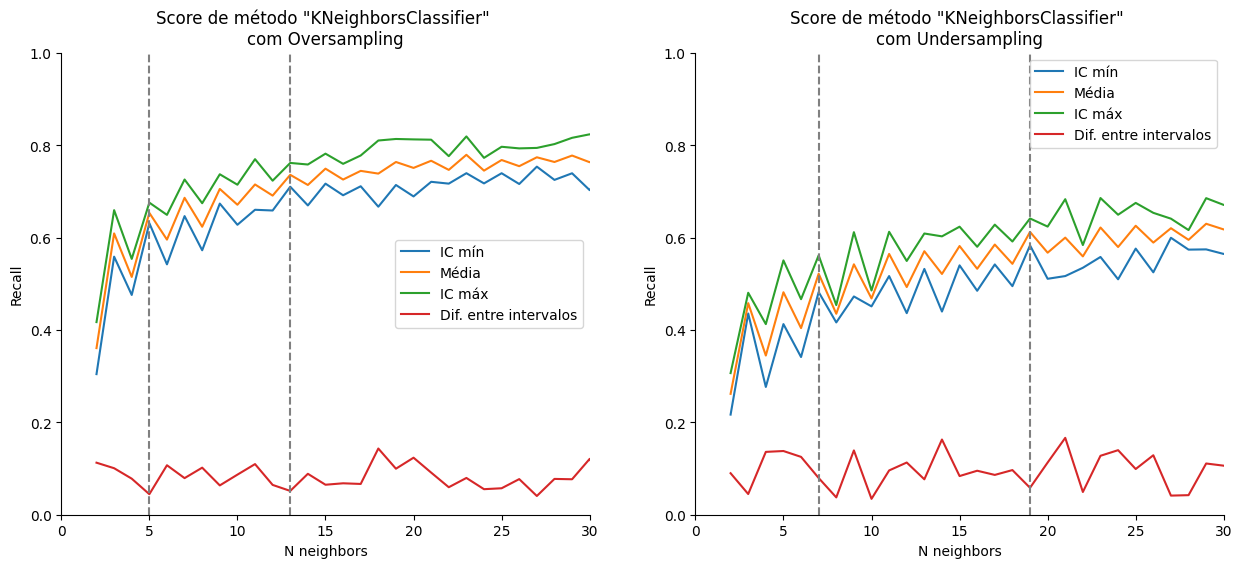

In [179]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax[0].set_title('Score de método "KNeighborsClassifier" \ncom Oversampling')
ax[0].plot(df_scores_KNeighborsClassifier_oversample, label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[0].set_xlabel('N neighbors')
ax[0].set_ylabel('Recall')
ax[0].set_xlim(0,30)
ax[0].set_ylim(0,1)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].legend()
ax[0].axvline(x=5, color='grey', linestyle='--')
ax[0].axvline(x=13, color='grey', linestyle='--')
#ax[0].axvline(x=23, color='grey', linestyle='--')

#ax[0].add_patch(rect)

ax[1].set_title('Score de método "KNeighborsClassifier" \ncom Undersampling')
ax[1].plot(df_scores_KNeighborsClassifier_undersample, label=['IC mín', 'Média', 'IC máx', 'Dif. entre intervalos'])
ax[1].set_xlabel('N neighbors')
ax[1].set_ylabel('Recall')
ax[1].set_xlim(0,30)
ax[1].set_ylim(0,1)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].legend()
ax[1].axvline(x=7, color='grey', linestyle='--')
ax[1].axvline(x=19, color='grey', linestyle='--')

* O método de Oversampling, com `n_neighbors=13`, se mostrou com métrica `recall` mais apropriada. 

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1291
           1       0.51      0.79      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758



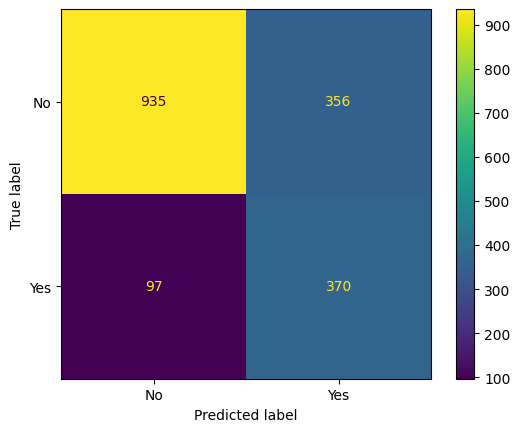

In [180]:
oversample = SMOTE()
X_balanceado_importante, y_balanceado_importante = oversample.fit_resample(X_normalizado_importante, y)
modelo = KNeighborsClassifier(n_neighbors = 13)
modelo.fit(X_balanceado_importante, y_balanceado_importante)
y_previsto_importante = modelo.predict(X_teste_normalizado_importante)

print(classification_report(y_teste, y_previsto_importante))
confusion_matrix_important_var = ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto_importante, display_labels=['No', 'Yes'])
confusion_matrix_important_var;

### Avaliando os modelos...

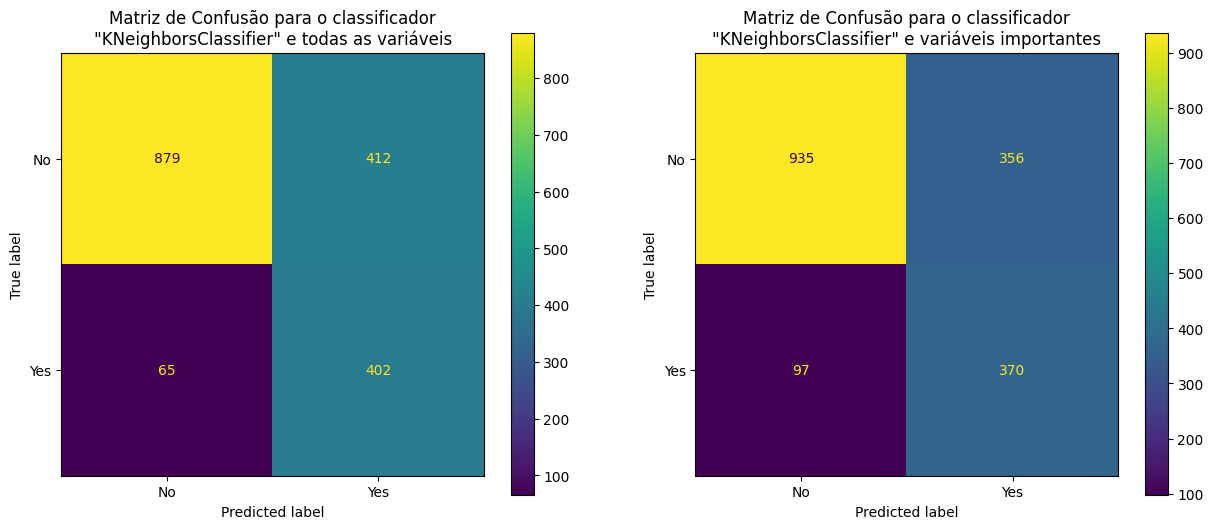

In [181]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax[0].set_title('Matriz de Confusão para o classificador\n"KNeighborsClassifier" e todas as variáveis')
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto, display_labels=['No', 'Yes'], ax=ax[0])
ax[1].set_title('Matriz de Confusão para o classificador\n"KNeighborsClassifier" e variáveis importantes')
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto_importante, display_labels=['No', 'Yes'], ax=ax[1])



### Interpretação

* O modelo com menos variáveis (seis no total) teve desempenho muito próximo ao conjunto completo de variáveis, o que pode indicar que as variáveis selecionadas são realmente representativas para treinamento do modelo.
* Utilizar modelo mais simples (menos complexos em número de variáveis) acarreta em menor consumo computacional para treinar o modelo, fato este que seria de escolha em datasets muito grandes;
* As variáveis de maior importância foram:`'remainder__onehotencoder__internet.OnlineSecurity_Yes'`, `'remainder__onehotencoder__internet.TechSupport_Yes'`,`'remainder__onehotencoder__account.Contract_Month-to-month'`,`'remainder__onehotencoder__account.Contract_One year'`, `'remainder__remainder__customer.SeniorCitizen'` e `'remainder__remainder__account.Charges.Monthly'`;
* O `recall` médio do modelo de classificação `KNeighborsClassifier` foi de **0.735684**;
* **Conclusão**: O modelo de classificação  treinado para prever a permanência ou saída de clientes da empresa TelecomX demonstrou desempenho promissor, especialmente em sua capacidade de identificar corretamente os casos de evasão. Com um recall médio de 0.735684, o modelo conseguiu detectar aproximadamente 73,6% dos clientes que efetivamente deixaram a empresa, o que é crucial para estratégias de retenção. Esse resultado indica que, embora possa haver espaço para melhorias na precisão, o modelo já oferece uma base sólida para antecipar comportamentos de churn e permitir ações proativas por parte da equipe de marketing e relacionamento.

### Conclusão:

 O modelo de classificação  treinado para prever a permanência ou saída de clientes da empresa TelecomX demonstrou desempenho promissor, especialmente em sua capacidade de identificar corretamente os casos de evasão. Com um recall médio de 0.735684, o modelo conseguiu detectar aproximadamente 73,6% dos clientes que efetivamente deixaram a empresa, o que é crucial para estratégias de retenção. Esse resultado indica que, embora possa haver espaço para melhorias na precisão, o modelo já oferece uma base sólida para antecipar comportamentos de churn e permitir ações proativas por parte da equipe de marketing e relacionamento.
 
 Com base nos resultados obtidos pelo modelo , é possível identificar com clareza os principais fatores que influenciam a evasão de clientes da empresa TelecomX. As variáveis mais relevantes para a previsão de churn foram: **presença de segurança online**, **suporte técnico ativo**, **tipo de contrato** (especialmente mensal e anual), **perfil de cliente idoso (SeniorCitizen)** e **valor mensal** cobrado. Esses fatores revelam padrões comportamentais e estruturais que afetam diretamente a decisão do cliente de permanecer ou abandonar o serviço.
A presença de serviços como **OnlineSecurity** e **TechSupport** está associada à retenção, sugerindo que clientes que se sentem protegidos e bem atendidos tendem a permanecer. Já o tipo de contrato, especialmente o mensal, aparece como um indicativo de maior risco de evasão, possivelmente por oferecer maior flexibilidade para cancelamento. O perfil de clientes idosos também se destaca, o que pode apontar para necessidades específicas desse grupo que não estão sendo plenamente atendidas. Por fim, o valor da mensalidade influencia diretamente a percepção de custo-benefício, sendo um fator decisivo para muitos consumidores.
Diante disso, a TelecomX pode adotar estratégias de retenção mais direcionadas e eficazes, como:

* Oferecer pacotes com segurança online e suporte técnico incluídos, especialmente para clientes com contratos mensais.
* Incentivar a migração para contratos de maior duração com benefícios exclusivos, como descontos progressivos ou bônus de fidelidade.
* Desenvolver campanhas específicas para o público sênior, com atendimento personalizado e planos adaptados às suas necessidades.
* Monitorar clientes com mensalidades mais altas, oferecendo revisões de plano ou benefícios adicionais para aumentar a percepção de valor.

Além disso, o fato de o modelo com apenas seis variáveis ter desempenho semelhante ao modelo completo reforça a viabilidade de soluções mais enxutas e escaláveis, especialmente em contextos com grandes volumes de dados. Isso permite à empresa aplicar modelos preditivos com menor custo computacional, mantendo a eficácia na identificação de clientes em risco de evasão e fortalecendo suas ações de retenção com base nos dados.